In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re                                 
import string                             
nltk.download('stopwords')
from nltk.corpus import stopwords         
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer   
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
data = pd.read_csv("Reviews.csv")
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
print(data.shape)

(568454, 10)


In [8]:
print(data.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


Text(0, 0.5, 'Counts')

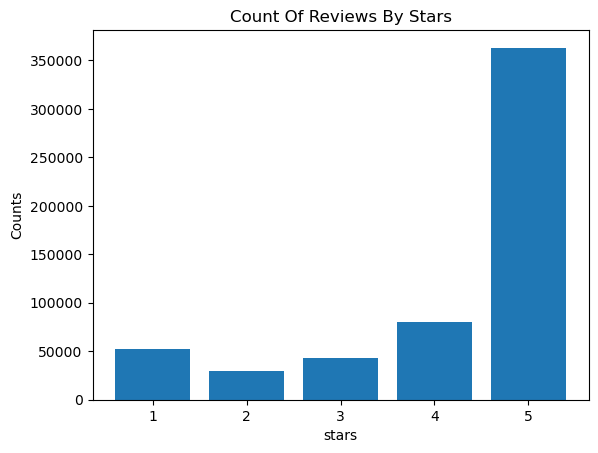

In [9]:
plt.bar(data['Score'].value_counts().index, data['Score'].value_counts().values)
plt.title('Count Of Reviews By Stars')
plt.xlabel('stars')
plt.ylabel('Counts')

In [10]:
df = data.head(1500)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
1495,1496,B002JLT6QC,A1EVDWA956XRJW,"Krystal-Karma ""Blessings, Joy and Love""",1,1,4,1319760000,Prefer the whole slices,I absolutely LOVE the just tomatoes tomatoe sl...
1496,1497,B002JLT6QC,A1E7G56OX03JKO,Ranch Girl,1,1,5,1309996800,Nice to have in the pantry,"I toss some of these in soups, or hydrate in a..."
1497,1498,B002KGN4LE,AIUQ25LZLYSJR,David T. Johnson,23,23,5,1275955200,Detailed reply from company over infant feedin...,MY QUESTION FOLLOWED BY THEIR REPLY - VERY GOO...
1498,1499,B002KGN4LE,A1AQPNFHTL0ZQH,L. Juarez,9,9,5,1272931200,Colic/acid reflux babies...try this!,HANDS DOWN the best formula on the market. Sa...


In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [13]:
d_t=df.drop(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator','Time', 'Summary'],axis=1)

In [14]:
d_t

,Id,Score,Text
0,1,5,I have bought several of the Vitality canned d...
1,2,1,Product arrived labeled as Jumbo Salted Peanut...
2,3,4,This is a confection that has been around a fe...
3,4,2,If you are looking for the secret ingredient i...
4,5,5,Great taffy at a great price. There was a wid...
...,...,...,...
1495,1496,4,I absolutely LOVE the just tomatoes tomatoe sl...
1496,1497,5,"I toss some of these in soups, or hydrate in a..."
1497,1498,5,MY QUESTION FOLLOWED BY THEIR REPLY - VERY GOO...
1498,1499,5,HANDS DOWN the best formula on the market. Sa...


In [15]:
def low(text):
    text = text.str.lower()
    return text

In [16]:
d_t["Text"] = low(d_t["Text"])
d_t.head()

,Id,Score,Text
0,1,5,i have bought several of the vitality canned d...
1,2,1,product arrived labeled as jumbo salted peanut...
2,3,4,this is a confection that has been around a fe...
3,4,2,if you are looking for the secret ingredient i...
4,5,5,great taffy at a great price. there was a wid...


In [17]:
d_t['Text']= d_t['Text'].apply(lambda x: re.sub(r"https\S+|www\S+https\S+", "", x))  
d_t['Text'] = d_t['Text'].apply(lambda x: re.sub(r'\@w+|\#', "", x)) 
d_t['Text'] = d_t['Text'].apply(lambda x: re.sub(r'[^\w\s]', "", x))  


In [18]:
# tokenization
for text in d_t['Text']:
        text_tokens = word_tokenize(text)
print(text_tokens)

['i', 'cant', 'believe', 'i', 'am', 'the', 'first', 'to', 'review', 'this', 'great', 'productbr', 'br', 'we', 'have', 'been', 'using', 'a', 'hrefhttpwwwamazoncomgpproductb001bm4jlcearths', 'best', 'organic', 'infant', 'formula', 'with', 'iron', '2575ounce', 'canistera', 'which', 'is', 'also', 'a', 'great', 'product', 'up', 'until', 'our', 'little', 'started', 'showing', 'signs', 'of', 'lactose', 'intolerance', 'after', 'consulting', 'with', 'the', 'pediatrician', 'we', 'started', 'searching', 'for', 'a', 'suitable', 'alternativebr', 'br', 'whilst', 'soy', 'formulas', 'are', 'being', 'offered', 'as', 'the', 'lactose', 'free', 'alternative', 'by', 'many', 'our', 'first', 'preference', 'was', 'nonsoy', 'alternative', 'we', 'also', 'wanted', 'a', 'natural', 'organic', 'product', 'free', 'of', 'those', 'nasty', 'chemicals', 'and', 'ingredients', 'after', 'a', 'considerable', 'amount', 'of', 'research', 'and', 'shopping', 'around', 'we', 'found', 'this', 'was', 'the', 'best', 'choice', 'out'

In [19]:
def remove_stopwords(text):
    text = text.apply(lambda x: " ".join(word for word in str(x).split() if word not in stop_words))
    return text

In [20]:
d_t["Text"] = remove_stopwords(d_t["Text"])

In [21]:
d_t

,Id,Score,Text
0,1,5,bought several vitality canned dog food produc...
1,2,1,product arrived labeled jumbo salted peanutsth...
2,3,4,confection around centuries light pillowy citr...
3,4,2,looking secret ingredient robitussin believe f...
4,5,5,great taffy great price wide assortment yummy ...
...,...,...,...
1495,1496,4,absolutely love tomatoes tomatoe slices though...
1496,1497,5,toss soups hydrate bit hot water add salads sa...
1497,1498,5,question followed reply good customer serviceb...
1498,1499,5,hands best formula market sadly breast milk dr...


In [22]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data


In [23]:
d_t['Text'] = d_t['Text'].apply(lambda x: stemming(x))

In [24]:
d_t.head(100)

,Id,Score,Text
0,1,5,bought several vitality canned dog food produc...
1,2,1,product arrived labeled jumbo salted peanutsth...
2,3,4,confection around centuries light pillowy citr...
3,4,2,looking secret ingredient robitussin believe f...
4,5,5,great taffy great price wide assortment yummy ...
...,...,...,...
95,96,5,ive pleased natural balance dog food dogs issu...
96,97,5,112 year old basenjijack russell mix loves dog...
97,98,5,pup experienced allergies forms hotspots itchi...
98,99,5,english bulldog skin allergies summer got age ...


In [25]:
reviews = d_t['Text'][:1500]

sia = SentimentIntensityAnalyzer()
sentiment_scores = []
for review in reviews:
    scores = sia.polarity_scores(review)
    sentiment_scores.append(scores)


sentiment_df = pd.DataFrame(sentiment_scores)
sentiment_df

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.168,0.553,0.280,0.8073
3,0.000,0.854,0.146,0.4404
4,0.000,0.369,0.631,0.9468
...,...,...,...,...
1495,0.075,0.576,0.349,0.8754
1496,0.000,0.711,0.289,0.7722
1497,0.026,0.862,0.112,0.9910
1498,0.125,0.714,0.161,0.7861


In [26]:
merged_df = pd.concat([d_t.reset_index(drop=True), sentiment_df], axis=1)
merged_df.head()


,Id,Score,Text,neg,neu,pos,compound
0,1,5,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,2,1,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027
2,3,4,confection around centuries light pillowy citr...,0.168,0.553,0.280,0.8073
3,4,2,looking secret ingredient robitussin believe f...,0.000,0.854,0.146,0.4404
4,5,5,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468


In [27]:
sentiments = []
for text in d_t['Text']:
    scores = sia.polarity_scores(str(text))
    compound_score = scores['compound']
    
    if compound_score >= 0.05:
        sentiment = 'Positive'
    elif compound_score <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    sentiments.append(sentiment)

df_copy = df.copy()
df_copy.loc[:, 'Sentiment'] = sentiments

sentiment_counts = df_copy['Sentiment'].value_counts()
sentiment_counts

Positive    1335
Negative     128
Neutral       37
Name: Sentiment, dtype: int64

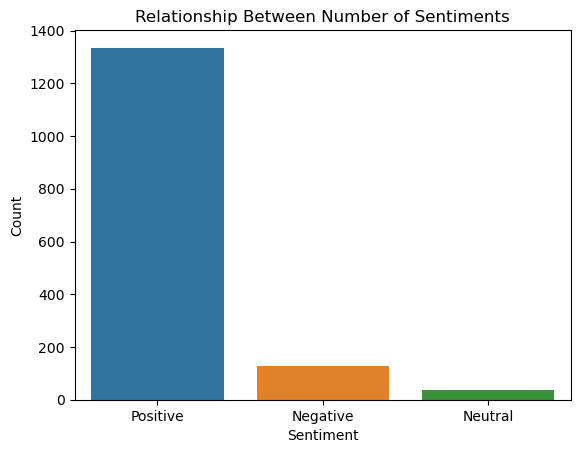

In [28]:
sentiment_counts = {'Sentiment': ['Positive', 'Negative', 'Neutral'],'Count': [1335, 128, 37]}
sentiment_df = pd.DataFrame(sentiment_counts)

sns.barplot(data=sentiment_df, x='Sentiment', y='Count')
plt.title('Relationship Between Number of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

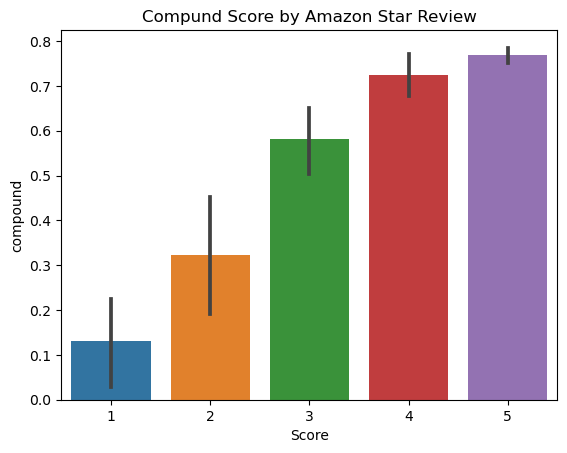

In [29]:
ax = sns.barplot(data=merged_df, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

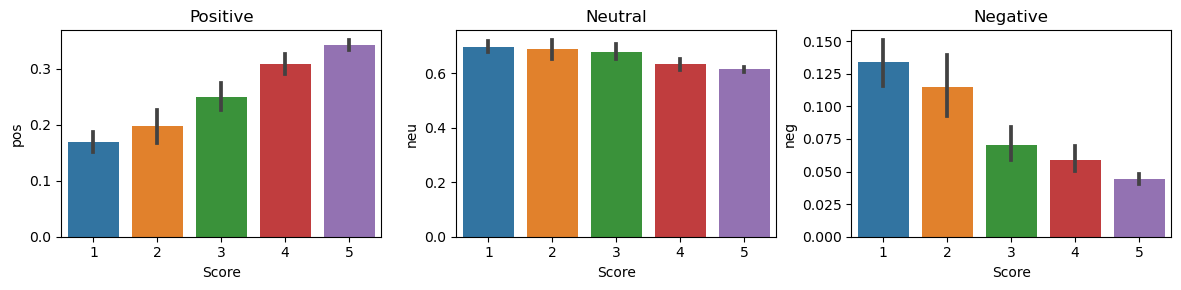

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=merged_df, x='Score', y='pos', ax=axs[0])
sns.barplot(data=merged_df, x='Score', y='neu', ax=axs[1])
sns.barplot(data=merged_df, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [92]:
sentiments[:10]

['Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive']

In [33]:
len(sentiments)

1500

In [34]:
dummies=pd.get_dummies(sentiments)

In [35]:
dummies

,Negative,Neutral,Positive
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
1495,0,0,1
1496,0,0,1
1497,0,0,1
1498,0,0,1


In [51]:
final_data=pd.concat((d_t,dummies['Positive']), axis=1)

In [52]:


final_data

,Id,Score,Text,Positive
0,1,5,bought several vitality canned dog food produc...,1
1,2,1,product arrived labeled jumbo salted peanutsth...,0
2,3,4,confection around centuries light pillowy citr...,1
3,4,2,looking secret ingredient robitussin believe f...,1
4,5,5,great taffy great price wide assortment yummy ...,1
...,...,...,...,...
1495,1496,4,absolutely love tomatoes tomatoe slices though...,1
1496,1497,5,toss soups hydrate bit hot water add salads sa...,1
1497,1498,5,question followed reply good customer serviceb...,1
1498,1499,5,hands best formula market sadly breast milk dr...,1


In [53]:
#separating data 
x = final_data['Text'].values
y = final_data['Positive'].values

In [56]:
y

array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [57]:
x

array(['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
       'product arrived labeled jumbo salted peanutsthe peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
       'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story cs lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
       ...,
       'question followed reply good customer servicebr br hey guysbr trying feed new born much breast milk however enough meet nutritional needsbr formula order supplement interested toddler formula appears since meets fda infant formula guidelines safe opinions internet seem feel way however doctor says used higher amounts calcium phosphorous also concerned using dh

In [58]:
from sklearn.model_selection import train_test_split

In [60]:
#splitting data into train and test data :)
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size=0.2 , stratify=y, random_state=2)

In [62]:
#converting text data into numerical values ;)
from sklearn.feature_extraction.text import TfidfVectorizer


In [64]:
vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [68]:
print(x_train)

  (0, 5422)	0.05130179689536838
  (0, 3283)	0.060631581575254646
  (0, 1126)	0.043687365768269544
  (0, 1289)	0.07933735199846995
  (0, 7496)	0.04224385179888696
  (0, 7304)	0.09488514731309002
  (0, 475)	0.044875661727675986
  (0, 2099)	0.07526601398022462
  (0, 5161)	0.045189007661200445
  (0, 3015)	0.05359223389371335
  (0, 998)	0.052313099387475165
  (0, 5660)	0.09172717220449476
  (0, 2683)	0.04905067942709104
  (0, 7328)	0.09895648533133534
  (0, 4416)	0.10469471397952272
  (0, 1676)	0.08696534538169337
  (0, 2279)	0.09895648533133534
  (0, 4954)	0.10469471397952272
  (0, 4847)	0.18345434440898953
  (0, 940)	0.09488514731309002
  (0, 7327)	0.05858543720286955
  (0, 1674)	0.07141755006707332
  (0, 326)	0.07820457053573496
  (0, 453)	0.04594831230038655
  (0, 6894)	0.07526601398022462
  :	:
  (1198, 5391)	0.14846393721012538
  (1198, 858)	0.10434228250554486
  (1198, 3435)	0.08063518652533971
  (1198, 992)	0.06670400718396045
  (1198, 2995)	0.1723425613135804
  (1198, 5153)	0.09671

In [69]:
from sklearn.linear_model import LogisticRegression

training our model

In [83]:
model=LogisticRegression(max_iter=1000)

In [84]:
model.fit(x_train , y_train)

LogisticRegression(max_iter=1000)

testing data :)

In [85]:
y_predict= model.predict(x_test)

In [86]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

accuracy score

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
score=accuracy_score(y_predict,y_test)

In [89]:
score*100

89.0